# Student Mark Predictor project

In [ ]:
# import libraries

import numpy as np # for mathematical calculation
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plot charts
import warnings
warnings.filterwarnings("ignore") # disable warnings

In [ ]:
#upload dataset
from google.colab import files
uploaded = files.upload()


Saving student_info.csv to student_info (1).csv


In [ ]:
#load dataset
df = pd.read_csv("student_info.csv")
df.head() # see 5 cells

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.info

<bound method DataFrame.info of      study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2            NaN          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
study_hours,195.0,6.995949,1.25306,5.01,5.775,7.12,8.085,8.99
student_marks,200.0,77.933750,4.92570,68.57,73.385,77.71,82.320,86.99


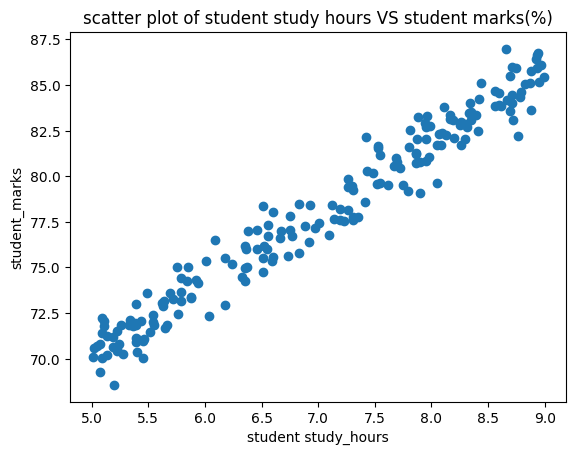

In [ ]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("student study_hours")
plt.ylabel("student_marks")
plt.title("scatter plot of student study hours VS student marks(%)")
plt.show()

#### prepare data for ml model

In [ ]:
# data cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
#clean the null values
df2 = df.fillna(df.mean())
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df.shape

(200, 2)

In [ ]:
df2.shape

(200, 2)

In [ ]:
# split the dataset
X = df2.drop("student_marks",axis = "columns") # X = independent
y = df2.drop("study_hours",axis = "columns") # y = dependent
print("shape of x", X.shape)
print("shape of y", y.shape)

shape of x (200, 1)
shape of y (200, 1)


### split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=51)
print("shape of X_train", X_train.shape)
print("shape of X_test", X_test.shape)
print("shape of y_train", y_train.shape)
print("shape of y_test", y_test.shape)

shape of X_train (160, 1)
shape of X_test (40, 1)
shape of y_train (160, 1)
shape of y_test (40, 1)


### select a model and train it

In [ ]:
# y = m*x + C

from sklearn.linear_model import LinearRegression
# create a object for class LinearRegression

lr = LinearRegression()

In [ ]:
#fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_ # m_value

array([[3.93571802]])

In [ ]:
lr.intercept_# c_value

array([50.44735504])

In [ ]:
# apply y = m*x + C then predict
m = 3.93571802 # lr.coef_
c = 50.44735504 # lr.intercept_

y = m * 5 + c # x = 5hours
y

70.12594514

In [ ]:
# apply y = m*x + C then predict
m = 3.93 # lr.coef_
c = 50.44 # lr.intercept_

y = m * 5 + c # x = 5hours
y

70.09

In [ ]:
lr.predict([[5]])

array([[70.12594512]])

In [ ]:
lr.predict([[5]])[0][0]

70.12594512018406

In [ ]:
lr.predict([[5]])[0][0].round(2) #round(2) means show only 2_values after points

70.13

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [ ]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ["student study_hours","student_marks original","student_marks predictor"]) # CONCATENATE or join X_test,y_test,y_pred then create a dataframe

,student study_hours,student_marks original,student_marks predictor
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [ ]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ["student study_hours","student_marks original","student_marks predictor"]).round(2)

,student study_hours,student_marks original,student_marks predictor
0,8.30,82.02,83.11
1,7.23,77.55,78.90
2,8.67,84.19,84.57
3,8.99,85.46,85.83
4,8.71,84.03,84.73
5,7.70,80.81,80.75
6,5.69,73.61,72.84
7,5.39,70.90,71.66
8,5.79,73.14,73.24
9,5.39,73.02,71.66


### fine-tune model

In [ ]:
lr.score(X_test,y_test) # 95.14% accuracy

0.9514124242154466

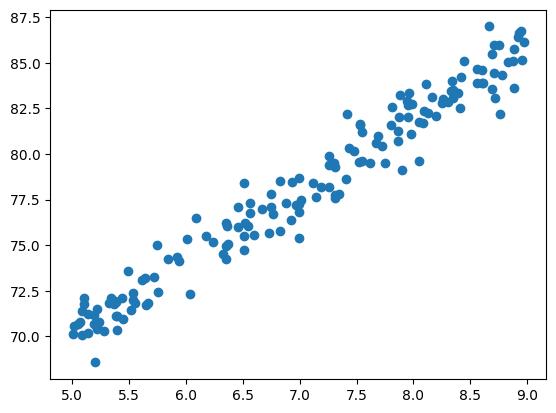

In [ ]:
plt.scatter(X_train,y_train)

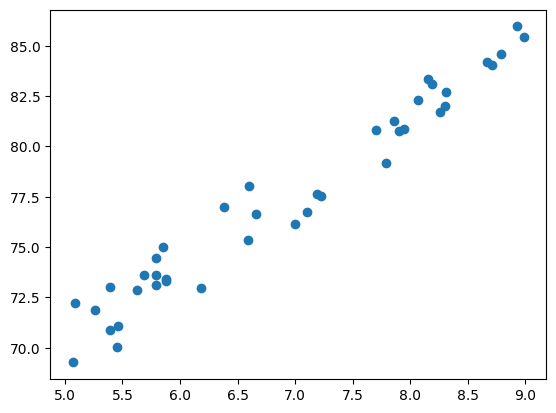

In [ ]:
plt.scatter(X_test,y_test)

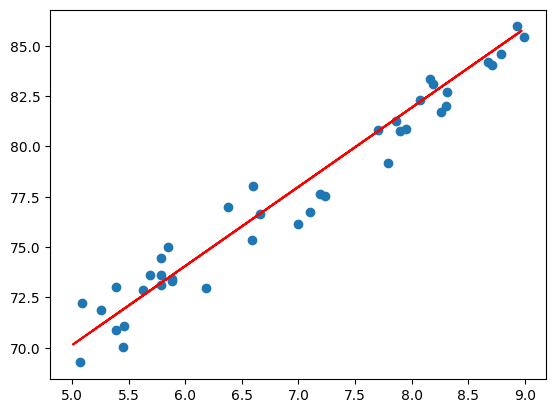

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train), color = "r") # fit the line

##Present solution

### save ml model

In [ ]:
import joblib
joblib.dump(lr,"Student_Mark_Predictor_Model.pk1")

['Student_Mark_Predictor_Model.pk1']

In [ ]:
model = joblib.load("Student_Mark_Predictor_Model.pk1")

In [ ]:
model.predict([[5]])

array([[70.12594512]])